# Laplacian Eigenmaps for Dimensionality Reduction

### Dr. Juan Orduz

In this notebook we present some simple examples which ilustrate the concepts discussed in the talk on [Laplacian Eigenmaps for Dimensionality Reduction](https://pydata.org/berlin2018/schedule/presentation/33/) at [PyData Berlin 2018](https://pydata.org/berlin2018/).

The sample data, visualization code and object descriptions can be found in the documentation.

**References:**

- http://scikit-learn.org/stable/modules/generated/sklearn.manifold.spectral_embedding.html

- http://scikit-learn.org/stable/modules/manifold.html#spectral-embedding

## 1. Notebook Setup

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

## 2. Back to Our Toy Example

<img src="images/toy_graph.png" alt="html" style="width: 400px;"/>

Let us compute the graph Laplacian from the adjacency matrix.

In [2]:
# Construct the adjacency matrix from the graph for n_neighbors = 1. 
W = np.array([[0, 1, 1, 1],
              [1, 0, 0, 0], 
              [1, 0, 0, 0], 
              [1, 0, 0, 0]])

# Construct the degree matrix D from W.
D = np.diag(np.apply_along_axis(arr=W,
                                func1d=np.sum,
                                axis=0))
# Compute the graph Laplacian.
L = D - W

print(L)

[[ 3 -1 -1 -1]
 [-1  1  0  0]
 [-1  0  1  0]
 [-1  0  0  1]]


Let us use `manifold.spectral_embedding` to compute the projection onto \\(\mathbb{R}\\).

In [3]:
y = manifold.spectral_embedding(adjacency=W, 
                                n_components=1, 
                                norm_laplacian=False, 
                                drop_first=True,
                                eigen_solver='lobpcg')

print(y)

[[ 0.        ]
 [-0.57735027]
 [ 0.78867513]
 [-0.21132487]]


Let us verify the result. Recall that the first non zero eigenvalue of is \\(\lambda_1 = 1\\). 

In [4]:
lambda_1 = 1

# Check if the previous output coincides with the analytical requirement. 
np.array_equal(a1=np.dot(L, y), 
               a2=lambda_1*np.dot(D, y))

True

Thus, \\(y\\) is a solution of \\(Lf = \lambda_1 Df\\) with \\(\lambda_1 =1\\).

## 3 Higher Dimensional Examples

###  3.1 S Curve

**Reference:** http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html

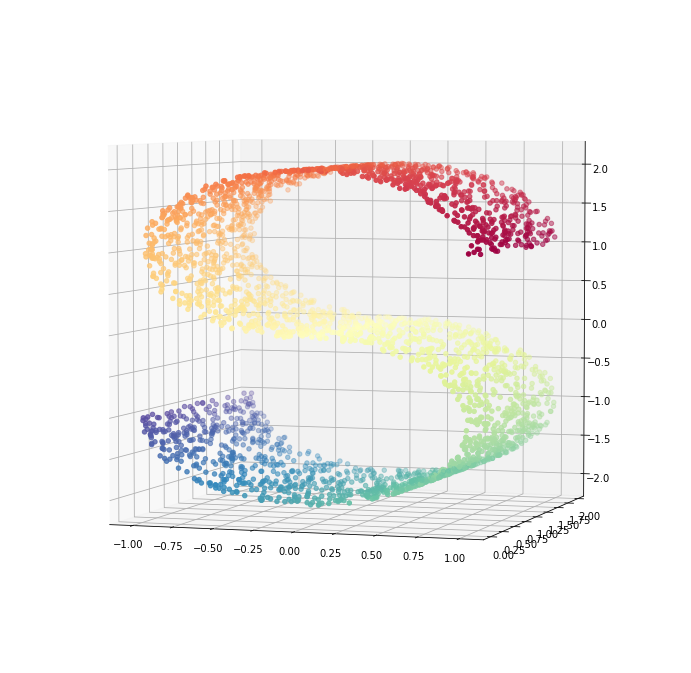

In [5]:
# Define the number of points to consider. 
n_points = 3000

# Get the data and color map. 
S_curve, S_colors = datasets.samples_generator.make_s_curve(n_points, random_state=0)

Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S_curve[:, 0], S_curve[:, 1], S_curve[:, 2],
           c=S_colors, 
           cmap=plt.cm.Spectral)
ax.view_init(4, -72);

#### 3.1.1 PCA

Let us see the result of PCA with `n_components=2`.

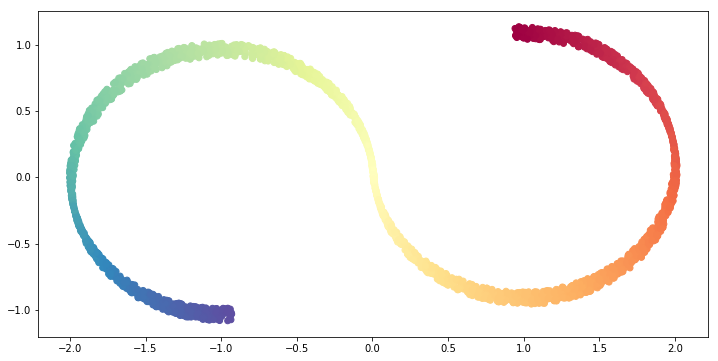

In [6]:
# Fit PCA object.
S_curve_pca = PCA(n_components=2).fit_transform(S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_curve_pca[:, 0], S_curve_pca[:, 1],
           c=S_colors, 
           cmap=plt.cm.Spectral);

The result is coincides with ouur intuition, it is basically projecting to an axis so that the variance is maximized.

#### 3.1.2 Spectral Embedding

Now let us use the method `SpectralEmbedding` from `sklearn`.

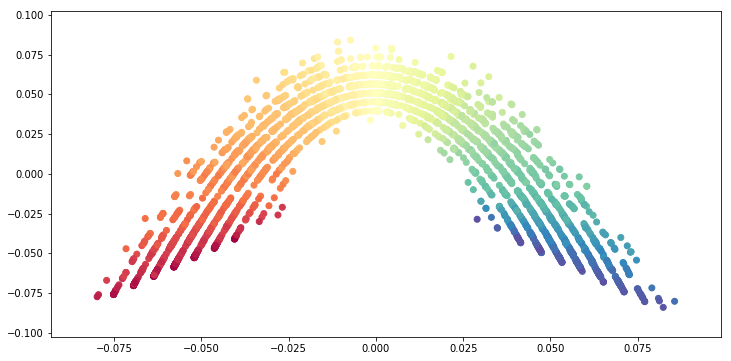

In [7]:
# Set the number of n_neighbors;
n_neighbors = 6 

# Set the dimension of the target space. 
n_components = 2

# Construct the SpectralEmbedding object. 
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity= 'nearest_neighbors',
                                n_neighbors=n_neighbors)

# Fit the SpectralEmbedding object. 
S_curve_red = se.fit_transform(X=S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_curve_red[:, 0], S_curve_red[:, 1],
           c=S_colors, 
           cmap=plt.cm.Spectral);

We see that `SpectralEmbedding` *unroll* the S-curve so that the locallity is preserved on average. 

Now let us consider `n_neighbors` >> 1.

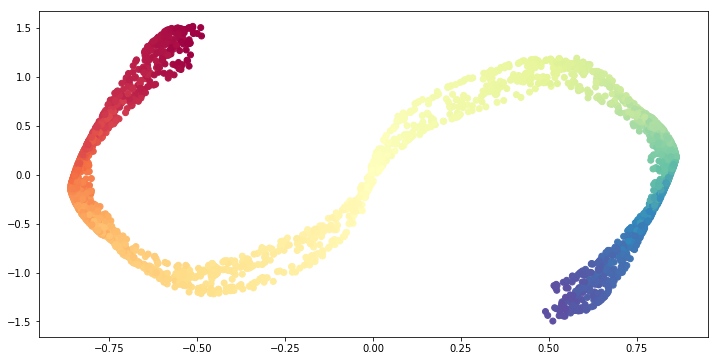

In [8]:
# Set the number of n_neighbors;
n_neighbors = 1500 

# Set the dimension of the target space. 
n_components = 2

# Construct the SpectralEmbedding object. 
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity= 'nearest_neighbors',
                                n_neighbors=n_neighbors)

# Fit the SpectralEmbedding object. 
S_curve_red = se.fit_transform(X=S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_curve_red[:, 0], S_curve_red[:, 1],
           c=S_colors, 
           cmap=plt.cm.Spectral);

The result is that the problem becomes more *global*. Thus, we get a similar result as PCA.

### 3.2 Two Dimensional Sphere \\(S^2\\)

**Reference:** http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html

First we generate the data.

In [9]:
# Create our sphere.
n_samples = 5000

angle_parameter = 0.5 # Try 0.01
pole_hole_parameter = 8 # Try 50

random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - angle_parameter)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / pole_hole_parameter))) & 
           (t > ((np.pi / pole_hole_parameter))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
          np.sin(t[indices]) * np.sin(p[indices]), \
          np.cos(t[indices])
        
sphere_data = np.array([x, y, z]).T

Let us visualize the data.

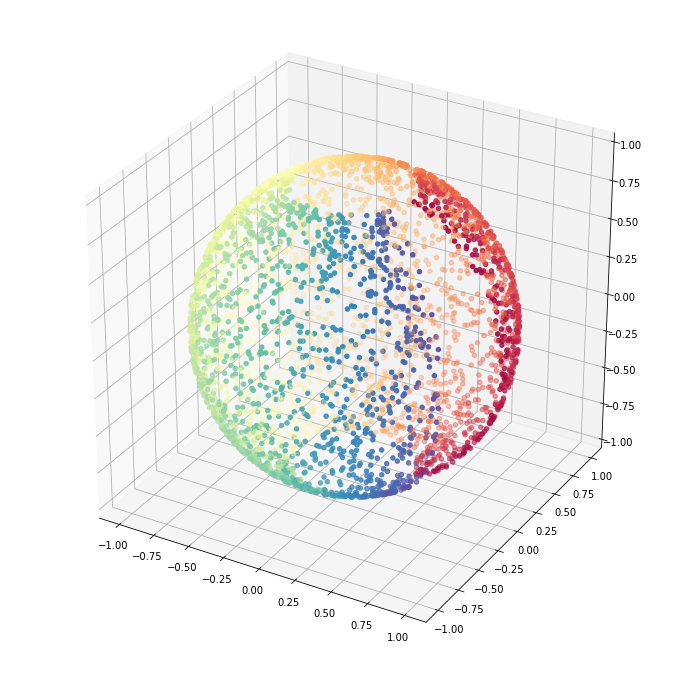

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           c=colors, 
           cmap=plt.cm.Spectral);

#### 3.2.1 PCA

Again, let us begin using PCA.

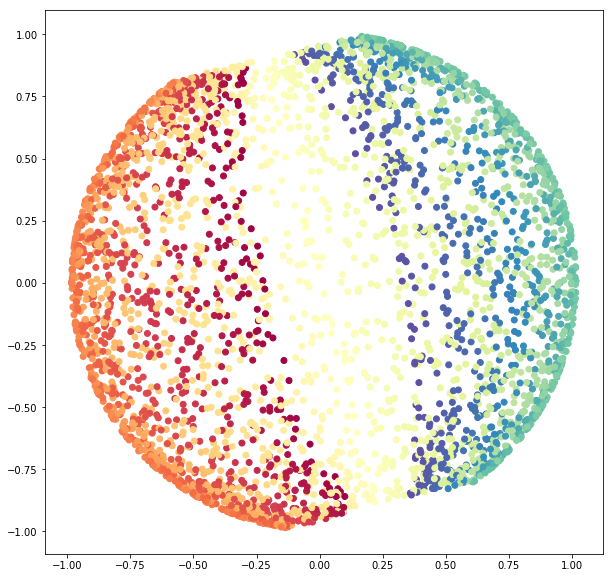

In [11]:
sphere_pca = PCA(n_components=2).fit_transform(sphere_data)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_pca[:, 0], sphere_pca[:, 1],
           c=colors, 
           cmap=plt.cm.Spectral);

#### 3.3.2 Spectral Embedding

In [12]:
n_neighbors = 8
n_components = 2

# Fit the object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)

sphere_data_red = se.fit_transform(X=sphere_data)

Let us visualize the results.

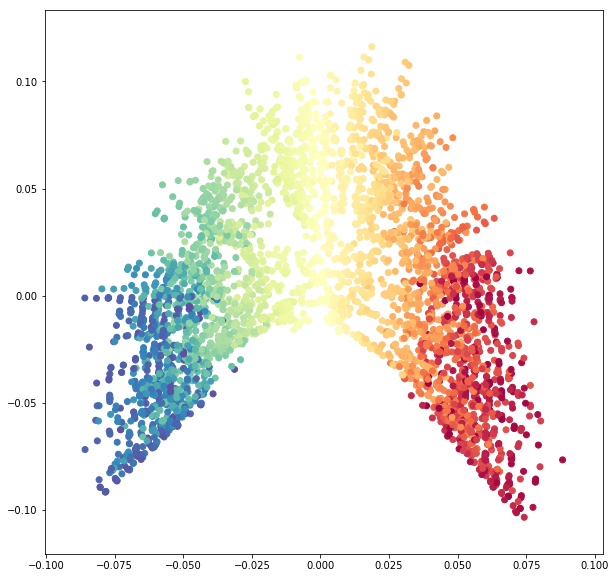

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_data_red[:, 0], sphere_data_red[:, 1],
           c=colors, 
           cmap=plt.cm.Spectral);

We see how `SpectralEmbedding` unrolls the sphere. 

Finally, let us take again `n_neighbors` >> 1.

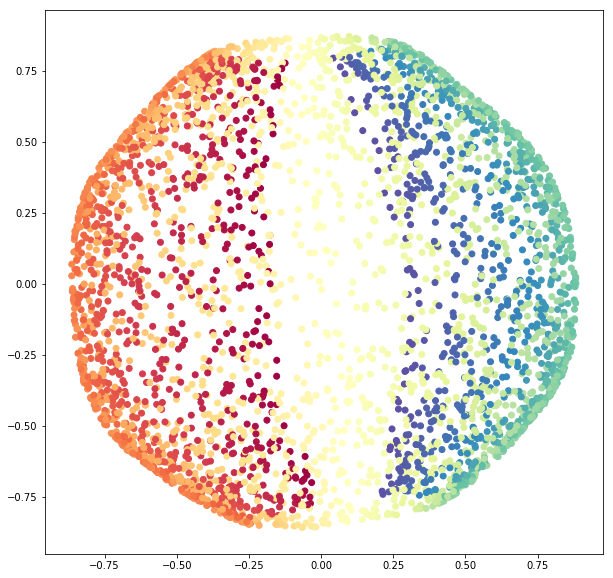

In [14]:
n_neighbors = 1000

# Fit the object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)

sphere_data_red = se.fit_transform(X=sphere_data)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_data_red[:, 0], sphere_data_red[:, 1],
           c=colors, 
           cmap=plt.cm.Spectral);